# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

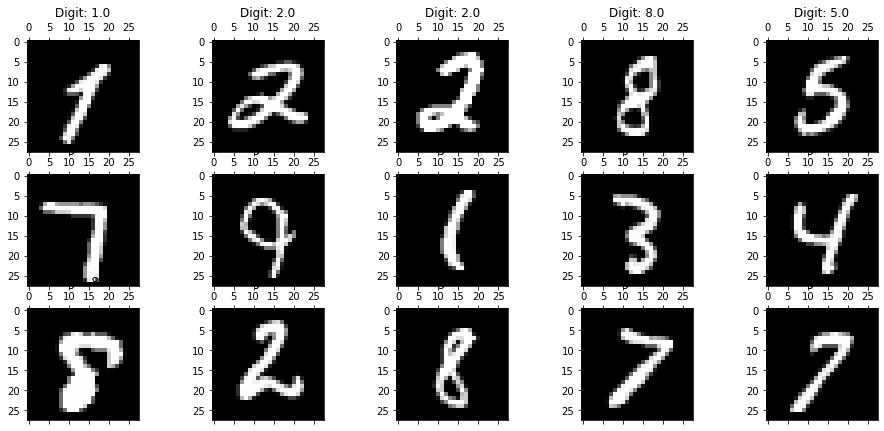

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
# pca를 사용하기 위해 scaling 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_std = scaler.transform(X_train) 

X_test_std = scaler.transform(X_test) 

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

주성분 개수를 정하기 위해       

1. Kaiser’s Rule : 고유값 1 이상의 주성분들
2. Elbow point : 곡선의 기울기가 급격히 감소하는 지점
3. 누적설명률이 70%~80% 이상인 지 확인

* Kaiser's Rule

In [12]:
cov_mat = np.cov(X_train.T)
cov_mat.shape

(784, 784)

In [13]:
# eigen value 구하기 
explain_values_raw, components_raw = lin.eig(cov_mat)
# 고유값이 1이상의 주성분들로 차원 축소 pca
pca_1 = len(explain_values_raw[explain_values_raw > 1])

In [15]:
from sklearn.decomposition import PCA
pca = PCA(pca_1).fit(X_train_std)

pca_X_train = pca.transform(X_train_std)
pca_X_test = pca.transform(X_test_std)

In [16]:
components = pca.components_

In [17]:
pca_X_train.shape 

(56000, 651)

Kaiser's rule은 주성분 개수가 너무 많기 때문에 다른 조건들도 확인

* elbow point

앞서 줄인 651개 중, explained_variance_ratio를 통해
explained variance : 각 eigenvalue의 비율

In [18]:
sing_vals = range(pca.n_components_)
sing_vals

range(0, 652)

range(0, 652)

In [19]:
eigvals = pca.explained_variance_ratio_

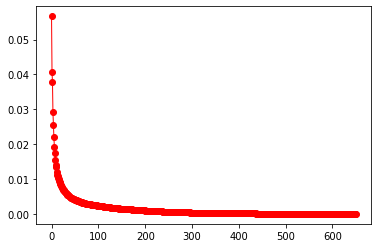

In [20]:
plt.plot(sing_vals, eigvals, 'ro-', linewidth=1)

(0.0, 40.0)

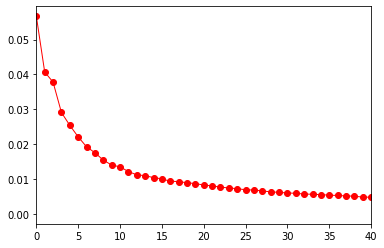

In [21]:
plt.plot(sing_vals, eigvals, 'ro-', linewidth=1)
plt.xlim(0,40)      # 30~40정도가 양호하다 판단

* 누적 설명률

In [22]:
pca = PCA(n_components=0.8)
pca.fit(X_train_std)
pca.n_components_

147

In [23]:
pca = PCA(n_components=0.75)
pca.fit(X_train_std)
pca.n_components_

119

scaling한 데이터는 119개 정도가 적당하다 판단

In [24]:
# 스케일링하지 않은 데이터는 주성분개수 43개 혹은 33개가 적당하다 판단
pca = PCA(n_components=0.8)
pca.fit(X_train)
pca.n_components_

43

In [25]:
pca = PCA(n_components=0.75)
pca.fit(X_train)
pca.n_components_

33

Randomforest 모델을 사용한다.

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=120)

In [27]:
pca.fit(X_train_std)

PCA(n_components=120)

In [28]:
PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=120)

In [29]:
new_X_train = pca.transform(X_train_std)
new_X_test = pca.transform(X_test_std)

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, y_train)

C:\Users\lbhde\AppData\Local\Temp\ipykernel_23908\3786449465.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(new_X_train, y_train)


RandomForestClassifier()

In [31]:
clf.score(new_X_test,y_test)

0.9422142857142857

scaling 한 데이터 주성분 개수 120으로 했을 때 0.942...

In [32]:
pca = PCA(n_components=43)
pca.fit(X_train)

PCA(n_components=43)

In [33]:
PCA(copy=True, iterated_power='auto', n_components=43, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=43)

In [34]:
new_X_train = pca.transform(X_train)
new_X_test = pca.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, y_train)

C:\Users\lbhde\AppData\Local\Temp\ipykernel_23908\3786449465.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(new_X_train, y_train)


RandomForestClassifier()

In [36]:
clf.score(new_X_test,y_test)  

0.9537142857142857

스케일링X 데이터 & randomforest & 주성분개수 43     
accuracy: 0.9537...

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)

In [38]:
pca.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components=33, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=33)

In [39]:
new_X_train = pca.transform(X_train)
new_X_test = pca.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(new_X_train, y_train)

C:\Users\lbhde\AppData\Local\Temp\ipykernel_23908\3786449465.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(new_X_train, y_train)


RandomForestClassifier()

In [41]:
clf.score(new_X_test,y_test)

0.9534285714285714

스케일링X & randomforest & 주성분개수 33        
accuracy: 0.9534...

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

## SVM

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=120)

In [44]:
pca.fit(X_train_std)
PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=120)

In [45]:
new_X_train = pca.transform(X_train_std)
new_X_test = pca.transform(X_test_std)

In [49]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf') # rbf kernel만 파라미터 설정
svc.fit(new_X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [50]:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC()

In [51]:
svc.score(new_X_test,y_test)

0.969

스케일링O, 주성분 개수 120      
0.969

In [52]:
#스케일링X, 주성분개수 43/33개
from sklearn.decomposition import PCA
pca = PCA(n_components=43)

In [53]:
pca.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components=43, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=43)

In [54]:
new_X_train = pca.transform(X_train)
new_X_test = pca.transform(X_test)

In [55]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf') # rbf kernel만 파라미터 설정
svc.fit(new_X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [56]:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


SVC()

In [57]:
svc.score(new_X_test,y_test)

0.9816428571428572

스케일링X & svm 사용 & 주성분개수 43     
accuracy: 0.9816        
가장 높은 정확도를 보임

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)

In [59]:
pca.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components=33, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=33)

In [60]:
new_X_train = pca.transform(X_train)
new_X_test = pca.transform(X_test)

In [61]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(new_X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [62]:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC()

In [63]:
svc.score(new_X_test,y_test)

#스케일링 안한 데이터/ SVM / 주성분개수 33
#accuracy 0.98

0.9809285714285715

* 스케일링 X 데이터 & 주성분 개수가 43이 적당하며 svm이 좋은 모델임을 확인할 수 있었다.
* accuracy는 0.9816이 가장 높았다.